# Exploring JupyterLab with IGN

## Overview & Purpose

The purpose of this notebook is to explore the JupyterLab environment by analyzing data obtained from IGN.com. This notebook will primarily employ the pandas, matplotlib, and numpy python packages to glean insight into the various drivers of a video game’s review score. This project is as much an exercise in data analysis through python as it is an opportunity to dive into the world of reproducible reporting. 

With that said, let's dive right in and get acquainted with our data!

**Quick note about our directory structure:**

To emulate the following code on your own machine, you will need to set up your directory in the following way:

  * IGN-Jupyter
    * Data
      * ign.csv
    * Notebooks
      * ign.ipynb

## The Setup: Importing and the Lay of the Land

### Importing

Before we can fly with correlations, regressions, and other fancy statistics, we need to do get our data loaded into our python environment. To do this we must begin by importing the pandas library. From there we can read in our dataset using the *read_csv()* method and assign it a name.

In [ ]:
import pandas as pd

reviews = pd.read_csv("..\\Data\\ign.csv")

We now have our data loaded into our enviornment! By default, the *read_csv()* method will store our data as a pandas DataFrame. For all intents and purposes, a DataFrame can be thought of standard two-demensional table akin to what you would look at in a spreadsheet program like Microsoft Excel. Looking just a little bit deeper, we can see that a DataFrame is really more like a dictionary made up of multiple Series. (We will get more into DataFrames and Series later on)

### Viewing with *head()* and *iloc()*

Now that we have a DataFrame to work with, let's get a glimpse of what our data actually looks like. Calling the *head()* method on our dataset outputs the first 5 rows of our data along with its column headers.

In [31]:
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Calling the *iloc* method on our dataset. We are grabing rows 0-5 and all columns. This operation returns the same result set as the *head()* method.

In [32]:
reviews.iloc[0:5,:]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Here we are redefining our reviews dataset to remove the first column of unnamed row numbers using the *iloc()* method and calling the *head()* method again.

In [33]:
reviews = reviews.iloc[:,1:]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


### Selecting Data with *loc()*

Using the *loc* method we can grab the first 5 rows of the score column. The *loc()* method allows us to reference columns by their header names

In [34]:
reviews.loc[:5,"score"]

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
5    7.0
Name: score, dtype: float64

We can also employ *loc()* to select multiple columns by passing it a list of header names.

In [35]:
reviews.loc[:5,["score", "release_year"]]

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
5,7.0,2012


## Pandas DataFrame Methods

### mean()

pandas.Series.mean() can be called to find the mean of a series.

In [36]:
reviews["score"].mean()

6.950459060402666

We can also use *mean()* to find the artithmetic mean of each colum in dataframe

In [37]:
reviews.mean()

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

In [38]:
reviews["score"].mean()

6.950459060402666

By setting the "axis  argument of the *mean()* method we can compute the arthimetic mean for each row instead of by column.

In [39]:
reviews.loc[:5,:].mean(axis=1)

0    510.500
1    510.500
2    510.375
3    510.125
4    510.125
5    509.750
dtype: float64

### corr()

Using the *corr()* method, we can see if any numeric columns have a correlation with score. 

In [40]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


Looking at the above table, we can see that none of our numeric columns are highly correlated with score. Infact, release_year, release_month, and relaese_day are all have a correlation coefficent of less than .1 with release_month in paticular being almost zero.

### More Methods

#### count()

The *count()* method counts the total number of non-null values in each column of a DataFrame.

In [41]:
reviews.count()

score_phrase      18625
title             18625
url               18625
platform          18625
score             18625
genre             18589
editors_choice    18625
release_year      18625
release_month     18625
release_day       18625
dtype: int64

#### max() & min()

*max()* and *min()* select the highest and lowest values from each column respectivley.

In [42]:
max_min = pd.DataFrame([reviews.max(), reviews.min()])
max_min

,score_phrase,title,url,platform,score,editors_choice,release_year,release_month,release_day
0,Unbearable,xXx: State of the Union,/games/zusar-vasar/dc-13794,iPod,10.0,Y,2016,12,31
1,Amazing,#IDARB,/games/0-d-beat-drop/xbox-360-14342395,Android,0.5,N,1970,1,1


In the above example we generated a dataframe from two series. The max series contains the maximum values from each of the columns. This means that the values in row 0 (the max series) are not tied together in any way across columns. For example. "xXX State of the Union" is not an iPod game and was not scored a 10.0 out of 10.0. Rather, the maximum value of the score column is 10.0 and the maximum value of the platform column is "iPod" (Based on alphabetical order)

To make this more clear, we can employ the *transpose()* method to switch our rows and columns.

In [43]:
max_min = max_min.transpose()
max_min.columns = ["Max", "Min"]
max_min

,Max,Min
score_phrase,Unbearable,Amazing
title,xXx: State of the Union,#IDARB
url,/games/zusar-vasar/dc-13794,/games/0-d-beat-drop/xbox-360-14342395
platform,iPod,Android
score,10,0.5
editors_choice,Y,N
release_year,2016,1970
release_month,12,1
release_day,31,1


As you can see above, we switched our rows and columns and renamed our column headers.

If we instead wanted to select all columns from the data that have the max score (10.0 )we could say:

In [44]:
high_scores = reviews.loc[reviews["score"] == max(reviews["score"])]
high_scores.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
1058,Masterpiece,The Legend of Zelda: Ocarina of Time,/games/the-legend-of-zelda-ocarina-of-time/n64...,Nintendo 64,10.0,"Action, Adventure",Y,1998,11,25
1287,Masterpiece,Pokemon Blue Version,/games/pokemon-blue-version/gb-16708,Game Boy,10.0,RPG,Y,1999,6,23
1289,Masterpiece,Pokemon Red Version,/games/pokemon-red-version/gb-9846,Game Boy,10.0,RPG,Y,1999,6,23
1354,Masterpiece,Joust,/games/defenderjoust/lynx-4146,Lynx,10.0,Action,N,1999,7,6
1363,Masterpiece,Shanghai,/games/shanghai-809520/lynx-5876,Lynx,10.0,Puzzle,N,1999,7,6


#### median()

The *median()* method calculates median for each numeric column

In [45]:
reviews.median()

score               7.3
release_year     2007.0
release_month       8.0
release_day        16.0
dtype: float64

#### std()

The *std()* method calculates the standard deviation for each numeric column

In [46]:
reviews.std()

score            1.711736
release_year     4.587529
release_month    3.476710
release_day      8.690128
dtype: float64

## Slicing and Indexing

We touched on this topic already in our discussion of max and min. In that section we used the *loc()* method to filter our data set to only those rows with a score equal to the maximum socre found in the dataset. Let's take a second here to explain a little of how this works behind the scenes.

In [47]:
score_filter = reviews["score"] > 5
score_filter.head()

0    True
1    True
2    True
3    True
4    True
Name: score, dtype: bool

In the above cell we compared the score of each row to 5 and generated a series containing boolean values. For each row, True means the score for that row was greater than 5, False means it was not. From there, we can used the below code to filter our reviews to only those rows that evaluated to True.

In [48]:
filtered_rows = reviews[score_filter]
filtered_rows.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


We can simplify this process by consoldiating the creation of the boolean series and the filtering of rows into one step. (The same process we used in our discussion of max and min)

In [49]:
filtered_rows = reviews.loc[reviews["score"] > 5]
filtered_rows.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


It is also possible to filter our dataset based on mulitple conditions. In the below code, I will generate a subset of our data where score is greater than 5 and genre is equal to sports.

In [54]:
okay_sports = reviews.loc[(reviews["score"] > 5) & (reviews["genre"] == "Sports")]
okay_sports.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
50,Amazing,NBA 2K13,/games/nba-2k13/xbox-360-132080,Xbox 360,9.1,Sports,Y,2012,9,27
56,Okay,Madden NFL 13,/games/madden-nfl-2013/vita-128100,PlayStation Vita,6.0,Sports,N,2012,8,24
57,Amazing,Madden NFL 13,/games/madden-nfl-2013/ps3-128098,PlayStation 3,9.0,Sports,Y,2012,8,24


## Plotting with Pandas

To set up plotting in our Jupyter Notebook we need to first specify how we would like our plots to be displayed.

In [51]:
%matplotlib inline

For the sake of this example, lets compare the distribtion of games by review score for the PS4 and Xbox One

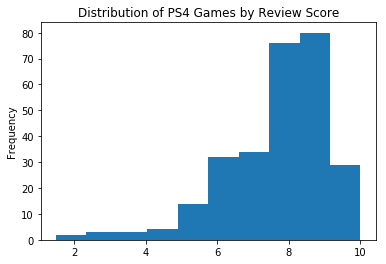

In [52]:
reviews[reviews["platform"] == "PlayStation 4"]["score"].plot(kind="hist", title="Distribution of PS4 Games by Review Score")

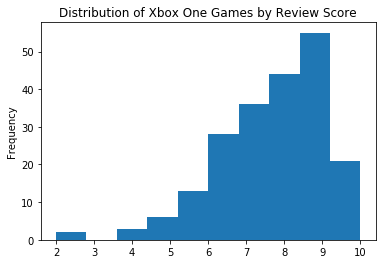

In [53]:
reviews[reviews["platform"] == "Xbox One"]["score"].plot(kind="hist", title="Distribution of Xbox One Games by Review Score")